In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd

data_path = '/content/drive/My Drive/Colab Notebooks/AIX/creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data) * 100, 2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


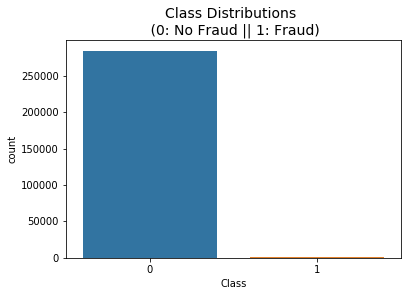

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [7]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.3, 
                             random_state=13, stratify=y)

In [9]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1]), array([199020,    344]))

In [10]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train) * 100

0.17254870488152324

In [11]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([85295,   148]))

In [12]:
tmp = np.unique(y_test, return_counts=True)[1]
tmp[1]/len(y_test) * 100

0.17321489179921118

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test , pred)
    pre = precision_score(y_test , pred)
    re = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> 오차 행렬')
    print(confusion)
    print('==========')

    print('정확도: {0:.4f}, 정밀도: {1:.4f}'.format(acc, pre))
    print('재현율: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [14]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> 오차 행렬
[[85284    11]
 [   60    88]]
정확도: 0.9992, 정밀도: 0.8889
재현율: 0.5946, F1: 0.7126, AUC:0.7972


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=3)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> 오차 행렬
[[85273    22]
 [   45   103]]
정확도: 0.9992, 정밀도: 0.8240
재현율: 0.6959, F1: 0.7546, AUC:0.8478


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> 오차 행렬
[[85290     5]
 [   38   110]]
정확도: 0.9995, 정밀도: 0.9565
재현율: 0.7432, F1: 0.8365, AUC:0.8716


In [17]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                          boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> 오차 행렬
[[85288     7]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9417
재현율: 0.7635, F1: 0.8433, AUC:0.8817


In [0]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [19]:
models = [lr_clf, dt_clf, lgbm_clf]
model_names = ['LinearReg.', 'DecisionTree', 'LightGBM']

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
LinearReg.,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999216,0.824000,0.695946,0.754579,0.847844
LightGBM,0.999508,0.941667,0.763514,0.843284,0.881716


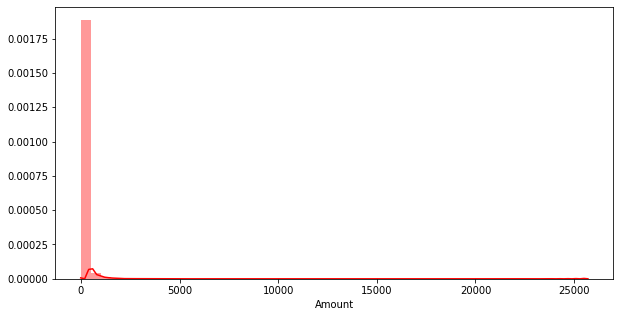

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['Amount'], color='r')

plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1, 1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


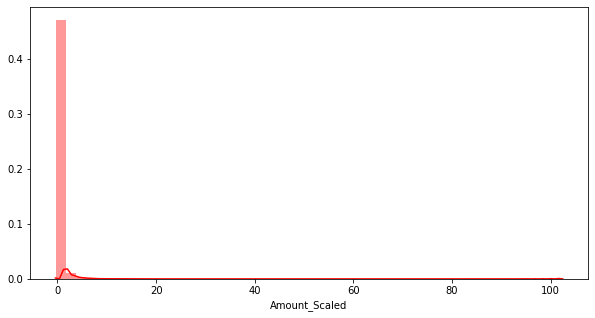

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

plt.show()

In [0]:
X = raw_data_copy

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.3, 
                             random_state=13, stratify=y)

In [24]:
models = [lr_clf, dt_clf, lgbm_clf]
model_names = ['LinearReg.', 'DecisionTree', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
LinearReg.,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999216,0.824000,0.695946,0.754579,0.847844
LightGBM,0.999520,0.942149,0.770270,0.847584,0.885094


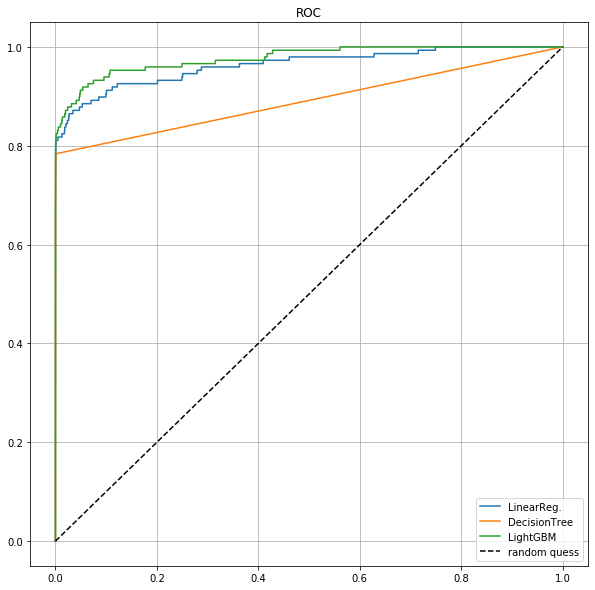

In [25]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test, y_test)

In [26]:
amount_n = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


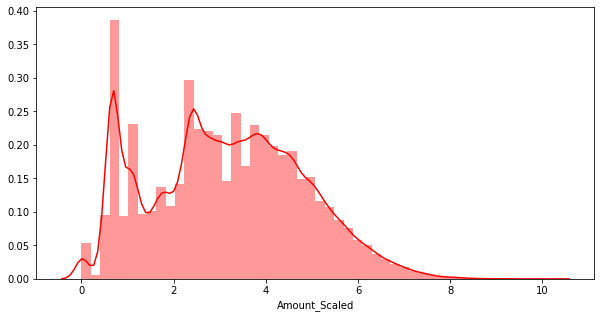

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

plt.show()

In [28]:
X = raw_data_copy

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.3, 
                             random_state=13, stratify=y)

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
LinearReg.,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999216,0.824000,0.695946,0.754579,0.847844
LightGBM,0.999508,0.941667,0.763514,0.843284,0.881716


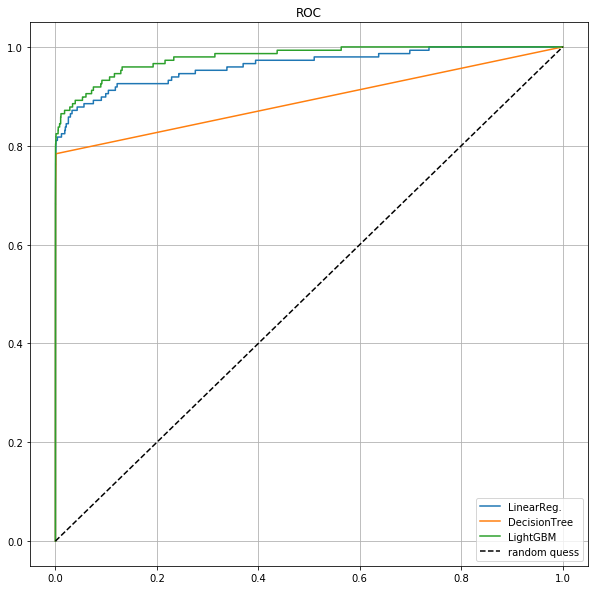

In [29]:
draw_roc_curve(models, model_names, X_test, y_test)

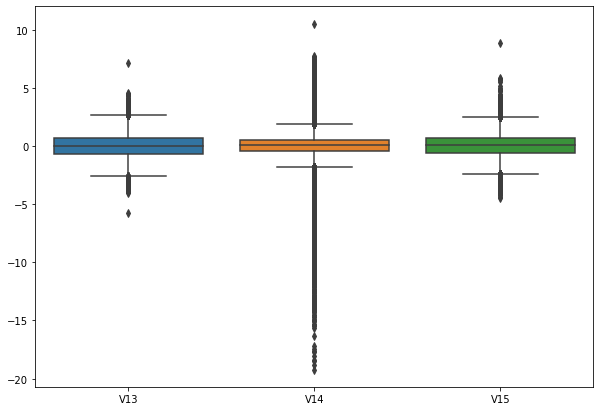

In [42]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']])

In [0]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [43]:
get_outlier(df=raw_data, column='V14', weight=1.5)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [45]:
raw_data_copy.shape

(284807, 29)

In [46]:
outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

In [0]:
X = raw_data_copy

raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.3, 
                             random_state=13, stratify=y)

In [48]:
models = [lr_clf, dt_clf, lgbm_clf]
model_names = ['LinearReg.', 'DecisionTree', 'LightGBM']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
LinearReg.,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999345,0.835821,0.767123,0.800000,0.883433
LightGBM,0.999590,0.958678,0.794521,0.868914,0.897231


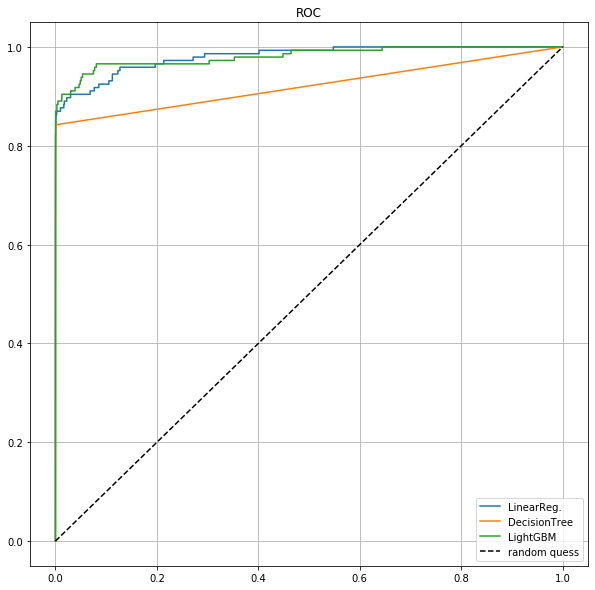

In [49]:
draw_roc_curve(models, model_names, X_test, y_test)